In [91]:
import pandas as pd
gmm_xgb_acc = pd.read_csv(r'C:\Users\makos2tamas911\Documents\dev\mm\at_1\lstm_stock\legacy\lossok\gmm_xgb_acc_per_fold.csv')
gmm_xgb_loss = pd.read_csv(r'C:\Users\makos2tamas911\Documents\dev\mm\at_1\lstm_stock\legacy\lossok\gmm_xgb_loss_per_fold.csv')
xgb_acc = pd.read_csv(r'C:\Users\makos2tamas911\Documents\dev\mm\at_1\lstm_stock\legacy\lossok\xgb_acc_per_fold.csv')
xgb_loss = pd.read_csv(r'C:\Users\makos2tamas911\Documents\dev\mm\at_1\lstm_stock\legacy\lossok\xgb_loss_per_fold.csv')
reference_acc = pd.read_csv(r'C:\Users\makos2tamas911\Documents\dev\mm\at_1\lstm_stock\legacy\lossok\reference_acc_per_fold.csv')
reference_loss = pd.read_csv(r'C:\Users\makos2tamas911\Documents\dev\mm\at_1\lstm_stock\legacy\lossok\reference_loss_per_fold.csv')

In [92]:
#cutting the last 30 rows from xgb_acc and xgb_loss
xgb_acc_n = xgb_acc.iloc[:-30]
xgb_loss_n = xgb_loss.iloc[:-30]

gmm_acc = xgb_acc.iloc[-30:]
gmm_loss = xgb_loss.iloc[-30:]

xgb_acc = xgb_acc_n
xgb_loss = xgb_loss_n

#renaming the columns
xgb_acc.columns = ['fold', 'XGB']
xgb_loss.columns = ['fold', 'XGB']
gmm_acc.columns = ['fold', 'GMM']
gmm_loss.columns = ['fold', 'GMM']

reference_acc.columns = ['fold', 'Reference']
reference_loss.columns = ['fold', 'Reference']

gmm_xgb_acc.columns = ['fold', 'GMM_XGB']
gmm_xgb_loss.columns = ['fold', 'GMM_XGB']

#dropping fold columns
gmm_acc = gmm_acc.drop(columns=['fold'])
gmm_loss = gmm_loss.drop(columns=['fold'])
xgb_acc = xgb_acc.drop(columns=['fold'])
xgb_loss = xgb_loss.drop(columns=['fold'])
reference_acc = reference_acc.drop(columns=['fold'])
reference_loss = reference_loss.drop(columns=['fold'])
gmm_xgb_acc = gmm_xgb_acc.drop(columns=['fold'])
gmm_xgb_loss = gmm_xgb_loss.drop(columns=['fold'])

#resetting the index
gmm_acc = gmm_acc.reset_index(drop=True)
gmm_loss = gmm_loss.reset_index(drop=True)
xgb_acc = xgb_acc.reset_index(drop=True)
xgb_loss = xgb_loss.reset_index(drop=True)
reference_acc = reference_acc.reset_index(drop=True)
reference_loss = reference_loss.reset_index(drop=True)
gmm_xgb_acc = gmm_xgb_acc.reset_index(drop=True)
gmm_xgb_loss = gmm_xgb_loss.reset_index(drop=True)

In [93]:
print(gmm_acc.shape)
print(gmm_loss.shape)
print(xgb_acc.shape)
print(xgb_loss.shape)
print(reference_acc.shape)
print(reference_loss.shape)
print(gmm_xgb_acc.shape)
print(gmm_xgb_loss.shape)

(30, 1)
(30, 1)
(30, 1)
(30, 1)
(30, 1)
(30, 1)
(30, 1)
(30, 1)


In [103]:
#adding the dataframes together by columns
loss = pd.DataFrame(
    {
        'GMM': gmm_loss['GMM'],
        'XGB': xgb_loss['XGB'],
        'Reference': reference_loss['Reference']
    }
)

acc = pd.DataFrame(
    {
        'GMM': gmm_acc['GMM'],
        'XGB': xgb_acc['XGB'],
        'Reference': reference_acc['Reference']
    }
)

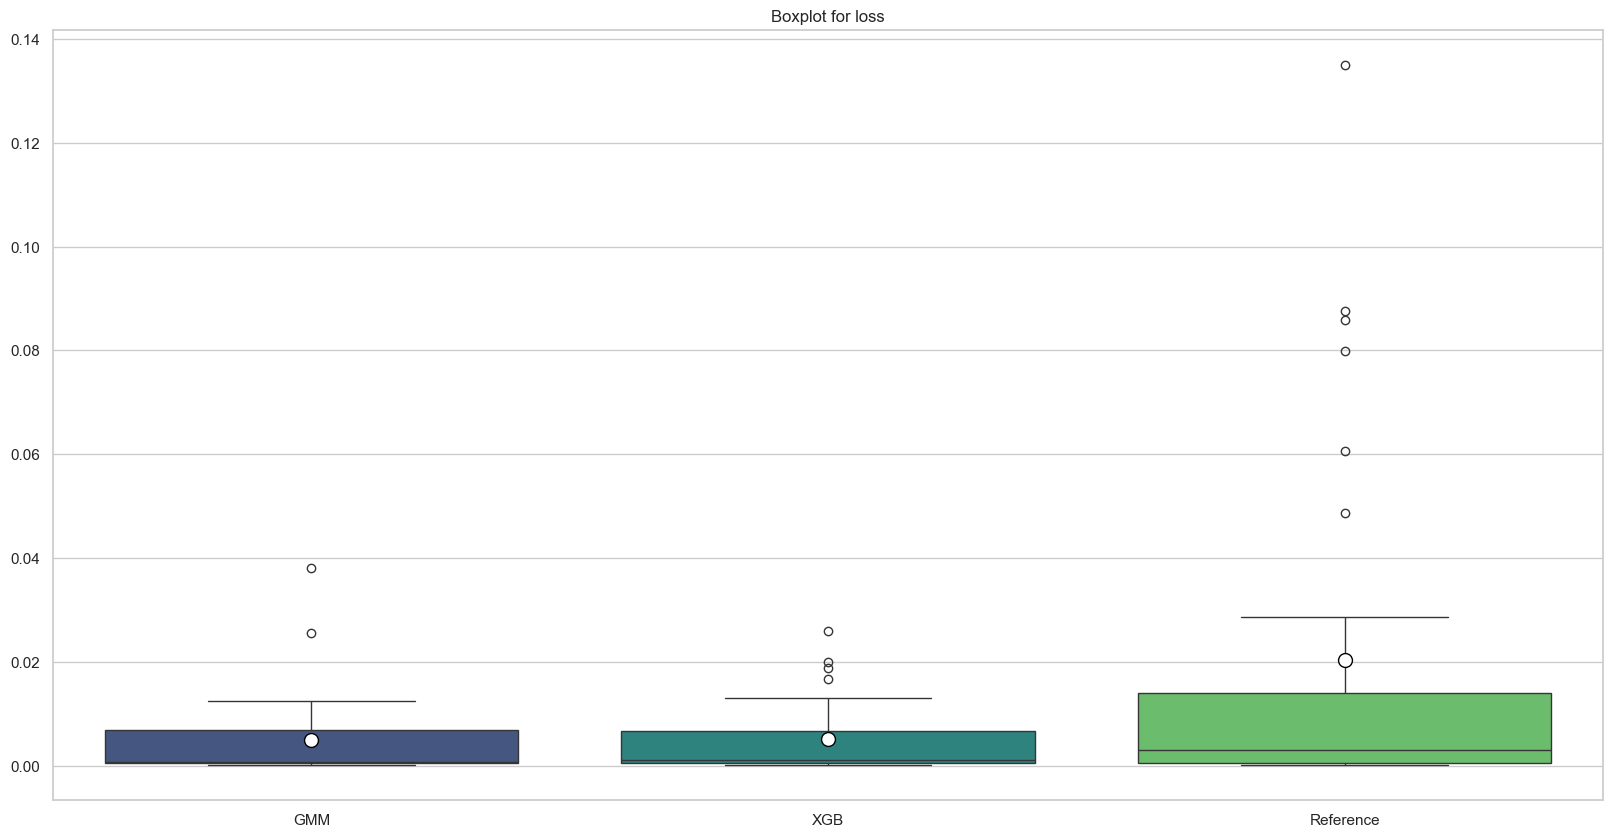

In [104]:
#boxplot for loss
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
#setting the style
sns.set(style='whitegrid')
sns.boxplot(data=loss, palette='viridis',
            showmeans=True, meanprops={"marker":"o",
                                        "markerfacecolor":"white",
                                        "markeredgecolor":"black",
                                        "markersize":"10"})

plt.title('Boxplot for loss')
plt.show()

In [105]:
#performing an anova test
import scipy.stats as stats
f_val, p_val = stats.f_oneway(loss['GMM'], loss['XGB'], loss['Reference'])
print(f'F-value: {f_val}')
print(f'P-value: {p_val}')

F-value: 5.302434794100599
P-value: 0.00671549250555327


In [98]:
#ttest for GMM and XGB
t_val, p_val = stats.ttest_ind(loss['GMM'], loss['XGB'])
print(f'T-value: {t_val}')
print(f'P-value: {p_val}')

T-value: -0.1620996566640443
P-value: 0.871790778700845


In [99]:
#ttest for GMM and Reference
t_val, p_val = stats.ttest_ind(loss['GMM'], loss['Reference'])
print(f'T-value: {t_val}')
print(f'P-value: {p_val}')

T-value: -2.374055578548836
P-value: 0.020925029207281863


In [100]:
#ttest for XGB and Reference
t_val, p_val = stats.ttest_ind(loss['XGB'], loss['Reference'])
print(f'T-value: {t_val}')
print(f'P-value: {p_val}')

T-value: -2.342210658358216
P-value: 0.022624147919503724


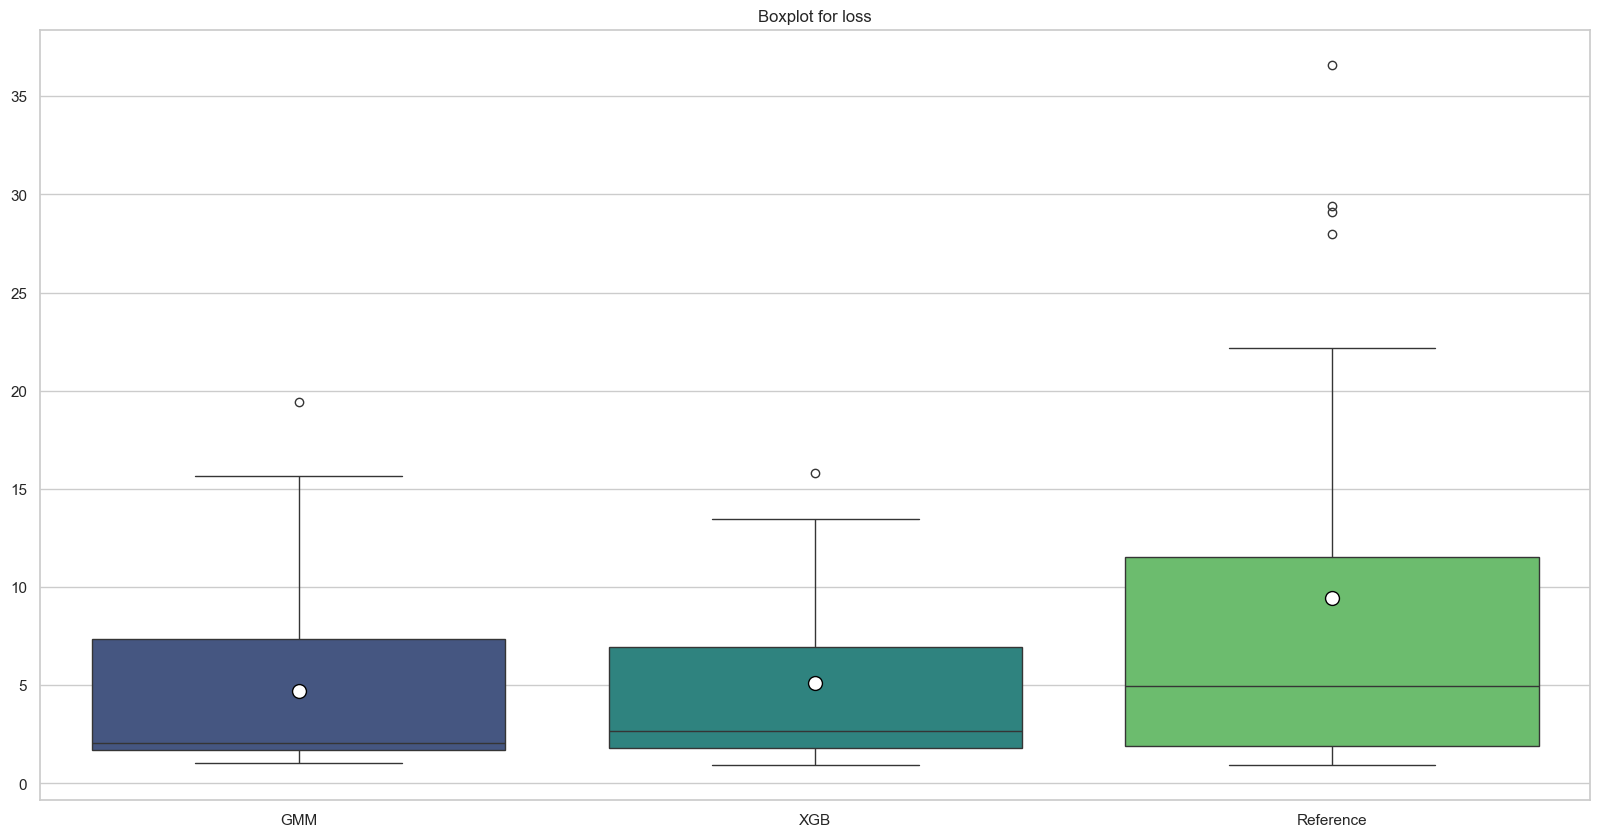

In [107]:
#boxplot for acc
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
#setting the style
sns.set(style='whitegrid')
sns.boxplot(data=acc, palette='viridis',
            showmeans=True, meanprops={"marker":"o",
                                        "markerfacecolor":"white",
                                        "markeredgecolor":"black",
                                        "markersize":"10"})

plt.title('Boxplot for loss')
plt.show()

In [109]:
#anova test for acc
f_val, p_val = stats.f_oneway(acc['GMM'], acc['XGB'], acc['Reference'])
print(f'F-value: {f_val}')
print(f'P-value: {p_val}')

F-value: 4.084530600326102
P-value: 0.02016140677589679


In [120]:
#power analysis
import statsmodels.stats.power as smp

# Parameters
effect_size = 0.5 # assumed effect size
alpha = 0.05        # significance level
power = 0.70        # desired power
num_groups = 3      # number of groups in ANOVA

# Initialize power analysis object for ANOVA
analysis = smp.FTestAnovaPower()

# Calculate sample size
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, k_groups=num_groups)
print(f"Required sample size per group: {sample_size:.2f}")

Required sample size per group: 33.98
